This ICP shows how to classify images of Cifar10 dataset. It creates an image classifier using a keras.Sequential model, and loads data using cifar10.load.data().

In [50]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [51]:
from sklearn.model_selection import train_test_split

dataset = (X_train, y_train), (X_test, y_test) = cifar10.load_data() ## load dataset

print(X_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


Print out the name of classes

In [52]:
# The CIFAR-10 image classes
class_name = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck',
}

In [53]:
class_num = 10

The example below loads the CIFAR-10 dataset using the Keras API and creates a plot of the first nine images in the training dataset.

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


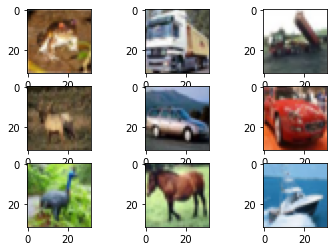

In [54]:
from matplotlib import pyplot

# summarize loaded dataset
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(X_train[i])
# show the figure
pyplot.show()

Create the model

The model consists of three convolution blocks with a max pool layer in each of them. There's a fully connected layer with 128 units on top of it that is activated by a relu activation function. This model has not been tuned for high accuracy, the goal of this ICP is to show a standard approach.

In [55]:
img_height=32
img_width=32

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(class_num)
])

Compile the model

 Choose the optimizers.Adam optimizer and losses.SparseCategoricalCrossentropy loss function. To view training and validation accuracy for each training epoch, pass the metrics argument.

In [56]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [57]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_4 (Rescaling)      (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 4, 4, 128)        

In [58]:
epochs = 10

history = model.fit(
  X_train,
  y_train,
  validation_data=(X_test, y_test),
  epochs=epochs, 
  batch_size=64,
  )

Epoch 1/10
782/782 [==============================] - 8s 10ms/step - loss: 1.3858 - accuracy: 0.5013 - val_loss: 1.2248 - val_accuracy: 0.5633
Epoch 2/10
782/782 [==============================] - 7s 10ms/step - loss: 0.9730 - accuracy: 0.6585 - val_loss: 0.9188 - val_accuracy: 0.6824
Epoch 3/10
782/782 [==============================] - 7s 9ms/step - loss: 0.7931 - accuracy: 0.7223 - val_loss: 0.8325 - val_accuracy: 0.7096
Epoch 4/10
782/782 [==============================] - 7s 9ms/step - loss: 0.6796 - accuracy: 0.7624 - val_loss: 0.7753 - val_accuracy: 0.7343
Epoch 5/10
782/782 [==============================] - 7s 10ms/step - loss: 0.5832 - accuracy: 0.7973 - val_loss: 0.7776 - val_accuracy: 0.7347
Epoch 6/10
782/782 [==============================] - 7s 10ms/step - loss: 0.4923 - accuracy: 0.8292 - val_loss: 0.7301 - val_accuracy: 0.7553
Epoch 7/10
782/782 [==============================] - 7s 9ms/step - loss: 0.4123 - accuracy: 0.8551 - val_loss: 0.8142 - val_accuracy: 0.7441
Ep

Visualize training results

Create plots of loss and accuracy on the training and validation sets.

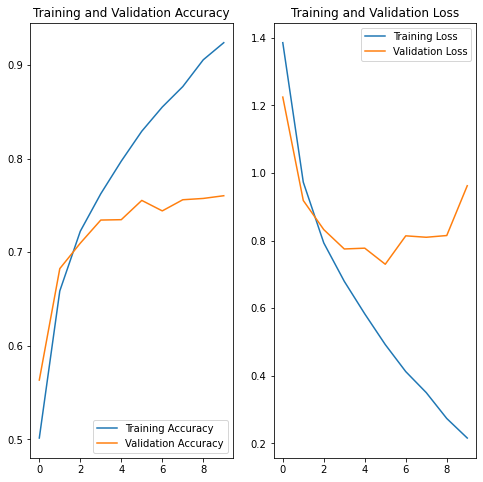

In [59]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

As you can see from the plots, training accuracy and validation accuracy are off by large margin and the model has achieved only around 60% accuracy on the validation set.

Let's look at what went wrong and try to increase the overall performance of the model.

Overfitting

In the plots above, the training accuracy is increasing linearly over time, whereas validation accuracy stalls around 60% in the training process. Also, the difference in accuracy between training and validation accuracy is noticeable—a sign of overfitting.

When there are a small number of training examples, the model sometimes learns from noises or unwanted details from training examples—to an extent that it negatively impacts the performance of the model on new examples. This phenomenon is known as overfitting. It means that the model will have a difficult time generalizing on a new dataset.

There are multiple ways to fight overfitting in the training process. In this tutorial, you'll use data augmentation and add Dropout to your model.

Data augmentation

Overfitting generally occurs when there are a small number of training examples. Data augmentation takes the approach of generating additional training data from your existing examples by augmenting then using random transformations that yield believable-looking images. This helps expose the model to more aspects of the data and generalize better.

We will implement data augmentation using experimental Keras Preprocessing Layers. These can be included inside your model like other layers, and run on the GPU.

In [60]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

Dropout

Another technique to reduce overfitting is to introduce Dropout to the network, a form of regularization.
When you apply Dropout to a layer it randomly drops out (by setting the activation to zero) a number of output units from the layer during the training process. Dropout takes a fractional number as its input value, in the form such as 0.1, 0.2, 0.4, etc. This means dropping out 10%, 20% or 40% of the output units randomly from the applied layer

In [61]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(class_num)
])

compile and train the model

In [62]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [63]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_7 (Sequential)    (None, 32, 32, 3)         0         
_________________________________________________________________
rescaling_5 (Rescaling)      (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 8, 8, 128)        

In [64]:
epochs = 10
history = model.fit(
  X_train,
  y_train,
  validation_data=(X_test, y_test),
  epochs=epochs, 
  batch_size=64,
  )

Epoch 1/10
782/782 [==============================] - 13s 15ms/step - loss: 1.5769 - accuracy: 0.4248 - val_loss: 1.3062 - val_accuracy: 0.5339
Epoch 2/10
782/782 [==============================] - 11s 14ms/step - loss: 1.2605 - accuracy: 0.5516 - val_loss: 1.3254 - val_accuracy: 0.5638
Epoch 3/10
782/782 [==============================] - 11s 14ms/step - loss: 1.1409 - accuracy: 0.5940 - val_loss: 1.0742 - val_accuracy: 0.6242
Epoch 4/10
782/782 [==============================] - 11s 14ms/step - loss: 1.0579 - accuracy: 0.6246 - val_loss: 0.9322 - val_accuracy: 0.6804
Epoch 5/10
782/782 [==============================] - 11s 14ms/step - loss: 1.0065 - accuracy: 0.6458 - val_loss: 0.9454 - val_accuracy: 0.6704
Epoch 6/10
782/782 [==============================] - 12s 15ms/step - loss: 0.9606 - accuracy: 0.6619 - val_loss: 0.9157 - val_accuracy: 0.6786
Epoch 7/10
782/782 [==============================] - 11s 14ms/step - loss: 0.9302 - accuracy: 0.6719 - val_loss: 0.8774 - val_accuracy:

In [65]:
#model as given has reached = Accuracy: 65.71%
# Accuracy: 51.32% with softmax
# Accuracy: 73.02% with relu activiation layer and conv2d start 32
# Accuracy: 66.92% : with data augmentation mode (horizontal_and_vertical)
model_eval = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (model_eval[1]*100))

Accuracy: 71.22%


visualize the results

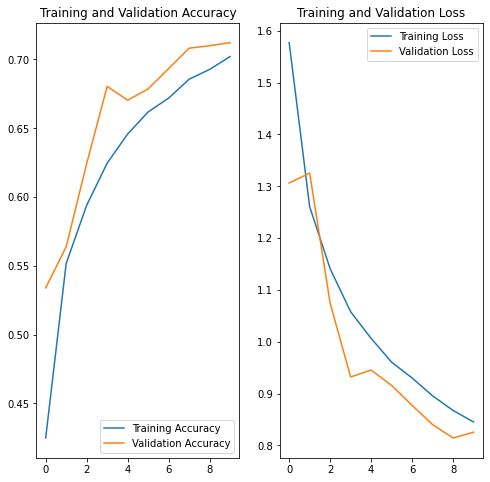

In [66]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Predict on new data

Finally, let's use our model to classify an image that wasn't included in the training or validation sets.

In [67]:
#1
deer_url = "https://www.nicepng.com/png/detail/254-2543414_white-tailed-deer-png.png"
deer_path = tf.keras.utils.get_file('deer', origin=deer_url)

img = keras.preprocessing.image.load_img(
    deer_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_name[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to deer with a 51.26 percent confidence.


In [68]:
#2
plane_url = "https://t4.ftcdn.net/jpg/03/12/53/29/360_F_312532912_uoJjUt3i8g5pB6rcliCVNNe7DnsHQ8iA.jpg"
plane_path = tf.keras.utils.get_file('Airplane', origin=plane_url)

img = keras.preprocessing.image.load_img(
    plane_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_name[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to airplane with a 98.10 percent confidence.


In [69]:
#3
cat_url = "https://www.kindpng.com/picc/m/42-427622_cat-png-transparent-png.png"
cat_path = tf.keras.utils.get_file('Cat', origin=cat_url)

img = keras.preprocessing.image.load_img(
    cat_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_name[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to truck with a 90.50 percent confidence.


In [70]:
#4
dog_url = "https://www.pngarts.com/files/1/Abandoned-Dog-PNG-High-Quality-Image.png"
dog_path = tf.keras.utils.get_file('Dog', origin=dog_url)

img = keras.preprocessing.image.load_img(
    dog_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_name[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to truck with a 75.86 percent confidence.


In [71]:
#5
ship_url = "https://i.pinimg.com/originals/fc/35/72/fc357254541c2886a4a8722cbfa9631e.png"
ship_path = tf.keras.utils.get_file('Ship', origin=ship_url)

img = keras.preprocessing.image.load_img(
    ship_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_name[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to ship with a 61.20 percent confidence.


Save the model

In [72]:
model.save("cifer10_model.h5")

load the model

In [73]:
from keras.models import load_model
model = load_model('cifer10_model.h5')